In [29]:
import tensorflow as tf
import os
import cv2
from matplotlib import pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.losses import BinaryCrossentropy


In [30]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [31]:
# Remove dodgy images
data_dir = 'data' 
image_exts = ['jpeg','jpg', 'bmp', 'png']

for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
Corrupt JPEG data: 200 extraneous bytes before marker 0xdb


In [32]:
import os
import imghdr
import cv2
import tensorflow as tf

data_dir = 'data'
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

# Remove corrupt or unsupported images
for image_class in os.listdir(data_dir):
    class_dir = os.path.join(data_dir, image_class)
    for image_file in os.listdir(class_dir):
        image_path = os.path.join(class_dir, image_file)
        try:
            # Check if the image format is supported
            if imghdr.what(image_path) not in image_exts:
                print('Unsupported image format:', image_path)
                os.remove(image_path)
        except Exception as e:
            print('Error processing image:', image_path, e)
            os.remove(image_path)

# Continue with the rest of your code...


In [33]:
# Load Data
data = tf.keras.utils.image_dataset_from_directory('data')

# Scale Data
data = data.map(lambda x,y: (x/255, y))

Found 1344 files belonging to 2 classes.


In [34]:
# Split Data
train_size = int(len(data) * 0.7)
val_size = int(len(data) * 0.2)
test_size = int(len(data) * 0.1)

train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

In [35]:
# Build Deep Learning Model
model = Sequential([
    Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)),
    MaxPooling2D(),
    Conv2D(32, (3,3), 1, activation='relu'),
    MaxPooling2D(),
    Conv2D(16, (3,3), 1, activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')  # Changed to sigmoid for binary classification
])

model.compile(optimizer='adam', loss=BinaryCrossentropy(), metrics=['accuracy'])


In [36]:
# Train
logdir = 'logs'
tensorboard_callback = TensorBoard(log_dir=logdir)
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])


Epoch 1/20


2024-02-08 23:42:54.945296: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


14/29 [=============>................] - ETA: 13s - loss: 0.9415 - accuracy: 0.4978

2024-02-08 23:43:08.974311: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


16/29 [===============>..............] - ETA: 11s - loss: 0.9106 - accuracy: 0.4883

Corrupt JPEG data: 200 extraneous bytes before marker 0xdb


29/29 [==============================] - ETA: 0s - loss: 0.8120 - accuracy: 0.5366

2024-02-08 23:43:20.229052: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-08 23:43:24.825790: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
Corrupt JPEG data: 200 extraneous bytes before marker 0xdb


29/29 [==============================] - 35s 1s/step - loss: 0.8120 - accuracy: 0.5366 - val_loss: 0.6883 - val_accuracy: 0.6602
Epoch 2/20


2024-02-08 23:43:29.379497: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


14/29 [=============>................] - ETA: 13s - loss: 0.6868 - accuracy: 0.6696

2024-02-08 23:43:43.358094: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


16/29 [===============>..............] - ETA: 11s - loss: 0.6856 - accuracy: 0.6680

Corrupt JPEG data: 200 extraneous bytes before marker 0xdb


29/29 [==============================] - ETA: 0s - loss: 0.6741 - accuracy: 0.6433

2024-02-08 23:43:53.355011: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-08 23:43:57.289136: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
Corrupt JPEG data: 200 extraneous bytes before marker 0xdb


29/29 [==============================] - 31s 1s/step - loss: 0.6741 - accuracy: 0.6433 - val_loss: 0.6395 - val_accuracy: 0.6289
Epoch 3/20


2024-02-08 23:44:00.240623: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


14/29 [=============>................] - ETA: 11s - loss: 0.6388 - accuracy: 0.6562

2024-02-08 23:44:11.868580: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


16/29 [===============>..............] - ETA: 9s - loss: 0.6552 - accuracy: 0.6426 

Corrupt JPEG data: 200 extraneous bytes before marker 0xdb


29/29 [==============================] - ETA: 0s - loss: 0.6626 - accuracy: 0.6207

2024-02-08 23:44:22.802570: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-08 23:44:26.725238: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
Corrupt JPEG data: 200 extraneous bytes before marker 0xdb


29/29 [==============================] - 29s 966ms/step - loss: 0.6626 - accuracy: 0.6207 - val_loss: 0.6703 - val_accuracy: 0.6094
Epoch 4/20


2024-02-08 23:44:29.690779: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


14/29 [=============>................] - ETA: 10s - loss: 0.6257 - accuracy: 0.7098

2024-02-08 23:44:40.286778: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


16/29 [===============>..............] - ETA: 8s - loss: 0.6217 - accuracy: 0.7090

Corrupt JPEG data: 200 extraneous bytes before marker 0xdb


29/29 [==============================] - ETA: 0s - loss: 0.6256 - accuracy: 0.6864

2024-02-08 23:44:50.119889: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-08 23:44:54.130987: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
Corrupt JPEG data: 200 extraneous bytes before marker 0xdb


29/29 [==============================] - 27s 905ms/step - loss: 0.6256 - accuracy: 0.6864 - val_loss: 0.6206 - val_accuracy: 0.6719
Epoch 5/20


2024-02-08 23:44:57.012145: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


14/29 [=============>................] - ETA: 9s - loss: 0.4823 - accuracy: 0.7857 

2024-02-08 23:45:06.566026: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


16/29 [===============>..............] - ETA: 8s - loss: 0.4807 - accuracy: 0.7871

Corrupt JPEG data: 200 extraneous bytes before marker 0xdb


29/29 [==============================] - ETA: 0s - loss: 0.5013 - accuracy: 0.7672

2024-02-08 23:45:15.362449: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-08 23:45:19.287461: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
Corrupt JPEG data: 200 extraneous bytes before marker 0xdb


29/29 [==============================] - 25s 831ms/step - loss: 0.5013 - accuracy: 0.7672 - val_loss: 0.5540 - val_accuracy: 0.7344
Epoch 6/20


2024-02-08 23:45:22.052812: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


14/29 [=============>................] - ETA: 9s - loss: 0.3794 - accuracy: 0.8415 

2024-02-08 23:45:31.809574: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


16/29 [===============>..............] - ETA: 8s - loss: 0.3634 - accuracy: 0.8457

Corrupt JPEG data: 200 extraneous bytes before marker 0xdb


29/29 [==============================] - ETA: 0s - loss: 0.3798 - accuracy: 0.8200

2024-02-08 23:45:41.167280: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-08 23:45:45.116194: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
Corrupt JPEG data: 200 extraneous bytes before marker 0xdb


29/29 [==============================] - 26s 861ms/step - loss: 0.3798 - accuracy: 0.8200 - val_loss: 0.5189 - val_accuracy: 0.7383
Epoch 7/20


2024-02-08 23:45:48.008612: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


14/29 [=============>................] - ETA: 9s - loss: 0.2382 - accuracy: 0.9085 

2024-02-08 23:45:57.906959: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


16/29 [===============>..............] - ETA: 8s - loss: 0.2346 - accuracy: 0.9062

Corrupt JPEG data: 200 extraneous bytes before marker 0xdb


29/29 [==============================] - ETA: 0s - loss: 0.2724 - accuracy: 0.8933

2024-02-08 23:46:06.738612: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-08 23:46:10.671927: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
Corrupt JPEG data: 200 extraneous bytes before marker 0xdb


29/29 [==============================] - 25s 840ms/step - loss: 0.2724 - accuracy: 0.8933 - val_loss: 0.5666 - val_accuracy: 0.7344
Epoch 8/20


2024-02-08 23:46:13.420581: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


14/29 [=============>................] - ETA: 9s - loss: 0.1930 - accuracy: 0.9487 

2024-02-08 23:46:23.090716: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


16/29 [===============>..............] - ETA: 8s - loss: 0.1842 - accuracy: 0.9492

Corrupt JPEG data: 200 extraneous bytes before marker 0xdb


29/29 [==============================] - ETA: 0s - loss: 0.1895 - accuracy: 0.9375

2024-02-08 23:46:32.140967: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-08 23:46:36.060299: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
Corrupt JPEG data: 200 extraneous bytes before marker 0xdb


29/29 [==============================] - 25s 841ms/step - loss: 0.1895 - accuracy: 0.9375 - val_loss: 0.5643 - val_accuracy: 0.7656
Epoch 9/20


2024-02-08 23:46:38.847557: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


14/29 [=============>................] - ETA: 9s - loss: 0.1217 - accuracy: 0.9710 

2024-02-08 23:46:48.451224: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


16/29 [===============>..............] - ETA: 8s - loss: 0.1201 - accuracy: 0.9707

Corrupt JPEG data: 200 extraneous bytes before marker 0xdb


29/29 [==============================] - ETA: 0s - loss: 0.1362 - accuracy: 0.9612

2024-02-08 23:47:00.534476: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-08 23:47:04.505050: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
Corrupt JPEG data: 200 extraneous bytes before marker 0xdb


29/29 [==============================] - 29s 974ms/step - loss: 0.1362 - accuracy: 0.9612 - val_loss: 0.6410 - val_accuracy: 0.8320
Epoch 10/20


2024-02-08 23:47:07.872481: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


14/29 [=============>................] - ETA: 11s - loss: 0.1021 - accuracy: 0.9665

2024-02-08 23:47:19.577809: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


16/29 [===============>..............] - ETA: 10s - loss: 0.0983 - accuracy: 0.9668

Corrupt JPEG data: 200 extraneous bytes before marker 0xdb


29/29 [==============================] - ETA: 0s - loss: 0.1195 - accuracy: 0.9569

2024-02-08 23:47:30.264799: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-08 23:47:34.204496: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
Corrupt JPEG data: 200 extraneous bytes before marker 0xdb


29/29 [==============================] - 29s 962ms/step - loss: 0.1195 - accuracy: 0.9569 - val_loss: 0.5687 - val_accuracy: 0.8477
Epoch 11/20


2024-02-08 23:47:37.036115: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


14/29 [=============>................] - ETA: 10s - loss: 0.0789 - accuracy: 0.9799

2024-02-08 23:47:48.047213: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


16/29 [===============>..............] - ETA: 9s - loss: 0.0788 - accuracy: 0.9785 

Corrupt JPEG data: 200 extraneous bytes before marker 0xdb


29/29 [==============================] - ETA: 0s - loss: 0.1034 - accuracy: 0.9709

2024-02-08 23:47:58.514653: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-08 23:48:02.483994: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
Corrupt JPEG data: 200 extraneous bytes before marker 0xdb


29/29 [==============================] - 29s 950ms/step - loss: 0.1034 - accuracy: 0.9709 - val_loss: 0.6102 - val_accuracy: 0.8359
Epoch 12/20


2024-02-08 23:48:05.747400: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


14/29 [=============>................] - ETA: 10s - loss: 0.0444 - accuracy: 0.9888

2024-02-08 23:48:16.501372: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


16/29 [===============>..............] - ETA: 9s - loss: 0.0415 - accuracy: 0.9902 

Corrupt JPEG data: 200 extraneous bytes before marker 0xdb


29/29 [==============================] - ETA: 0s - loss: 0.0610 - accuracy: 0.9806

2024-02-08 23:48:27.768631: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-08 23:48:32.282159: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
Corrupt JPEG data: 200 extraneous bytes before marker 0xdb


29/29 [==============================] - 30s 1000ms/step - loss: 0.0610 - accuracy: 0.9806 - val_loss: 0.6732 - val_accuracy: 0.8320
Epoch 13/20


2024-02-08 23:48:35.566467: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


14/29 [=============>................] - ETA: 11s - loss: 0.0507 - accuracy: 0.9866

2024-02-08 23:48:47.150888: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


16/29 [===============>..............] - ETA: 9s - loss: 0.0559 - accuracy: 0.9844 

Corrupt JPEG data: 200 extraneous bytes before marker 0xdb


29/29 [==============================] - ETA: 0s - loss: 0.0874 - accuracy: 0.9763

2024-02-08 23:48:57.844725: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-08 23:49:02.071083: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
Corrupt JPEG data: 200 extraneous bytes before marker 0xdb


29/29 [==============================] - 30s 996ms/step - loss: 0.0874 - accuracy: 0.9763 - val_loss: 0.7547 - val_accuracy: 0.8242
Epoch 14/20


2024-02-08 23:49:05.691187: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


14/29 [=============>................] - ETA: 11s - loss: 0.0472 - accuracy: 0.9866

2024-02-08 23:49:17.683050: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


16/29 [===============>..............] - ETA: 10s - loss: 0.0493 - accuracy: 0.9863

Corrupt JPEG data: 200 extraneous bytes before marker 0xdb


29/29 [==============================] - ETA: 0s - loss: 0.0654 - accuracy: 0.9849

2024-02-08 23:49:28.442346: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-08 23:49:32.430834: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
Corrupt JPEG data: 200 extraneous bytes before marker 0xdb


29/29 [==============================] - 30s 1s/step - loss: 0.0654 - accuracy: 0.9849 - val_loss: 0.6135 - val_accuracy: 0.8477
Epoch 15/20


2024-02-08 23:49:35.783250: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


14/29 [=============>................] - ETA: 11s - loss: 0.0374 - accuracy: 0.9844

2024-02-08 23:49:47.342196: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


16/29 [===============>..............] - ETA: 10s - loss: 0.0343 - accuracy: 0.9863

Corrupt JPEG data: 200 extraneous bytes before marker 0xdb


29/29 [==============================] - ETA: 0s - loss: 0.0496 - accuracy: 0.9871

2024-02-08 23:50:00.539857: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-08 23:50:05.479367: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
Corrupt JPEG data: 200 extraneous bytes before marker 0xdb


29/29 [==============================] - 34s 1s/step - loss: 0.0496 - accuracy: 0.9871 - val_loss: 0.5465 - val_accuracy: 0.8633
Epoch 16/20


2024-02-08 23:50:09.575886: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


14/29 [=============>................] - ETA: 11s - loss: 0.0277 - accuracy: 0.9955

2024-02-08 23:50:21.578299: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


16/29 [===============>..............] - ETA: 9s - loss: 0.0283 - accuracy: 0.9941 

Corrupt JPEG data: 200 extraneous bytes before marker 0xdb


29/29 [==============================] - ETA: 0s - loss: 0.0405 - accuracy: 0.9914

2024-02-08 23:50:31.040101: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-08 23:50:35.220496: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
Corrupt JPEG data: 200 extraneous bytes before marker 0xdb


29/29 [==============================] - 29s 939ms/step - loss: 0.0405 - accuracy: 0.9914 - val_loss: 0.6504 - val_accuracy: 0.8633
Epoch 17/20


2024-02-08 23:50:38.513955: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


14/29 [=============>................] - ETA: 11s - loss: 0.0288 - accuracy: 0.9933

2024-02-08 23:50:49.429622: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


16/29 [===============>..............] - ETA: 9s - loss: 0.0293 - accuracy: 0.9922 

Corrupt JPEG data: 200 extraneous bytes before marker 0xdb


29/29 [==============================] - ETA: 0s - loss: 0.0276 - accuracy: 0.9946

2024-02-08 23:50:58.998787: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-08 23:51:02.989225: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
Corrupt JPEG data: 200 extraneous bytes before marker 0xdb


29/29 [==============================] - 28s 926ms/step - loss: 0.0276 - accuracy: 0.9946 - val_loss: 0.6364 - val_accuracy: 0.8633
Epoch 18/20


2024-02-08 23:51:06.250099: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


14/29 [=============>................] - ETA: 12s - loss: 0.0166 - accuracy: 0.9955

2024-02-08 23:51:18.511017: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


16/29 [===============>..............] - ETA: 10s - loss: 0.0153 - accuracy: 0.9961

Corrupt JPEG data: 200 extraneous bytes before marker 0xdb


29/29 [==============================] - ETA: 0s - loss: 0.0258 - accuracy: 0.9914

2024-02-08 23:51:28.886518: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-08 23:51:32.850173: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
Corrupt JPEG data: 200 extraneous bytes before marker 0xdb


29/29 [==============================] - 30s 986ms/step - loss: 0.0258 - accuracy: 0.9914 - val_loss: 0.7704 - val_accuracy: 0.8281
Epoch 19/20


2024-02-08 23:51:35.815938: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


14/29 [=============>................] - ETA: 10s - loss: 0.0219 - accuracy: 0.9933

2024-02-08 23:51:46.298723: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


16/29 [===============>..............] - ETA: 9s - loss: 0.0224 - accuracy: 0.9941

Corrupt JPEG data: 200 extraneous bytes before marker 0xdb


29/29 [==============================] - ETA: 0s - loss: 0.0165 - accuracy: 0.9968

2024-02-08 23:51:55.806929: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-08 23:51:59.753974: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
Corrupt JPEG data: 200 extraneous bytes before marker 0xdb


29/29 [==============================] - 27s 906ms/step - loss: 0.0165 - accuracy: 0.9968 - val_loss: 0.5104 - val_accuracy: 0.8633
Epoch 20/20


2024-02-08 23:52:02.951214: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


14/29 [=============>................] - ETA: 10s - loss: 0.0223 - accuracy: 0.9933

2024-02-08 23:52:13.518809: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


16/29 [===============>..............] - ETA: 9s - loss: 0.0203 - accuracy: 0.9941

Corrupt JPEG data: 200 extraneous bytes before marker 0xdb


29/29 [==============================] - ETA: 0s - loss: 0.0176 - accuracy: 0.9946

2024-02-08 23:52:27.563043: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-08 23:52:32.593911: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
Corrupt JPEG data: 200 extraneous bytes before marker 0xdb


29/29 [==============================] - 33s 1s/step - loss: 0.0176 - accuracy: 0.9946 - val_loss: 0.6349 - val_accuracy: 0.8438


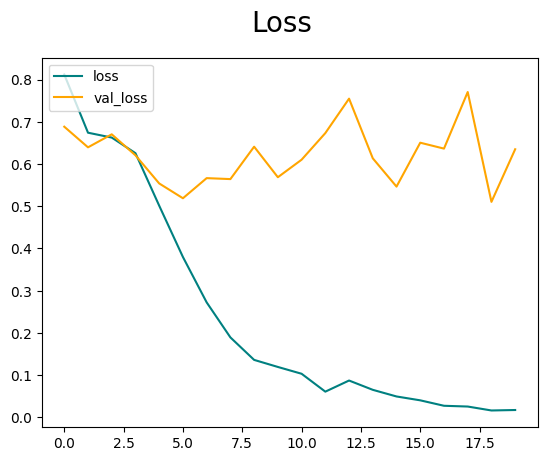

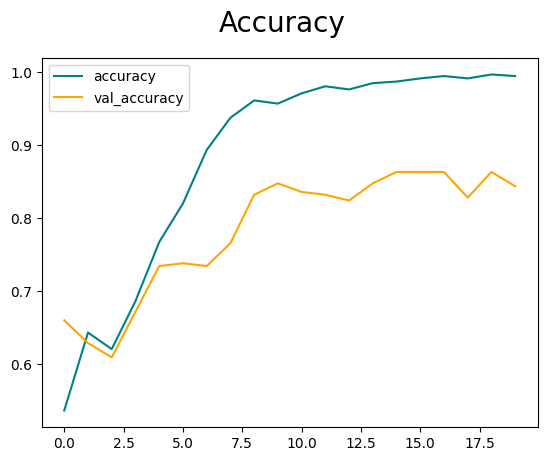

In [37]:

# Plot Performance
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [38]:
# Evaluate
loss, accuracy = model.evaluate(test)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

2024-02-08 23:52:36.224176: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-02-08 23:52:40.171213: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
Corrupt JPEG data: 200 extraneous bytes before marker 0xdb


4/4 [==============================] - 7s 220ms/step - loss: 1.0989 - accuracy: 0.8047
Test Loss: 1.0988657474517822
Test Accuracy: 0.8046875


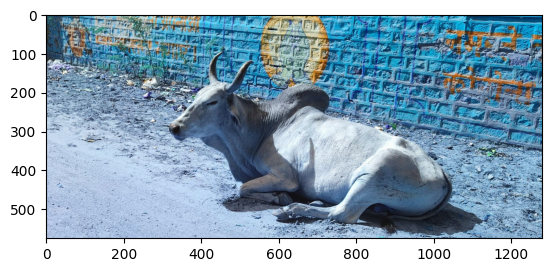

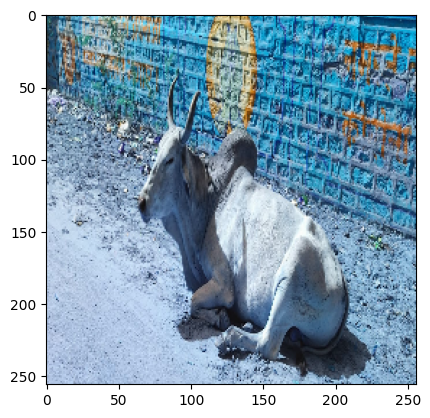

1/1 [==============================] - 0s 39ms/step
The animal is Not Injured


In [61]:
# Test
img = cv2.imread('Test2.png.jpeg')
plt.imshow(img)
plt.show()

resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

yhat = model.predict(np.expand_dims(resize/255, 0))
if yhat > 0.5: 
    print(f'The animal is Not Injured')
else:
    print(f'The animal is Injured')

In [27]:
# Save the Model
model.save('animal_injury_classifier.h5')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
